In [3]:
import pm4py
import pandas
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Carga de archivos - curso A1 16-17. No hay IDs para los usuarios.
event_log = pandas.read_csv('Data/A1-17-presencial-log.csv')
extra_data = pandas.read_csv("Data/A1-17-presencial-dataset.csv")
event_log_full = pandas.merge(left=event_log,
                    right=extra_data,
                    left_on='Nombrecompletodelusuario',
                    right_on='Nombrecompletodelusuario',
                    how="left")
event_log_filtered = pm4py.format_dataframe(event_log_full, case_id='Nombrecompletodelusuario', activity_key='Evento', timestamp_key='Hora')

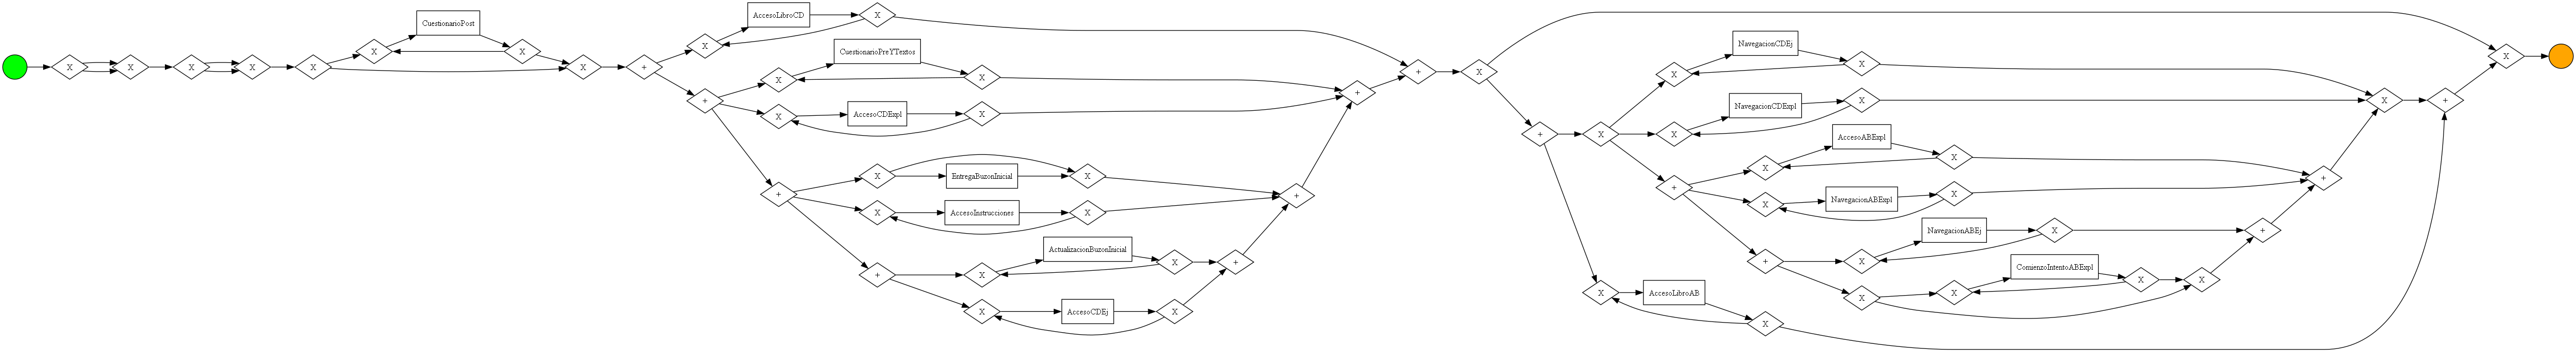

In [5]:
# Modelo BPMN
process_tree_f = pm4py.discover_process_tree_inductive(event_log_filtered, noise_threshold=0.2)
bpmn_model_f = pm4py.convert_to_bpmn(process_tree_f)
pm4py.view_bpmn(bpmn_model_f)
pm4py.save_vis_bpmn(bpmn_model_f, 'Graphs/1-Modelo-17.png')

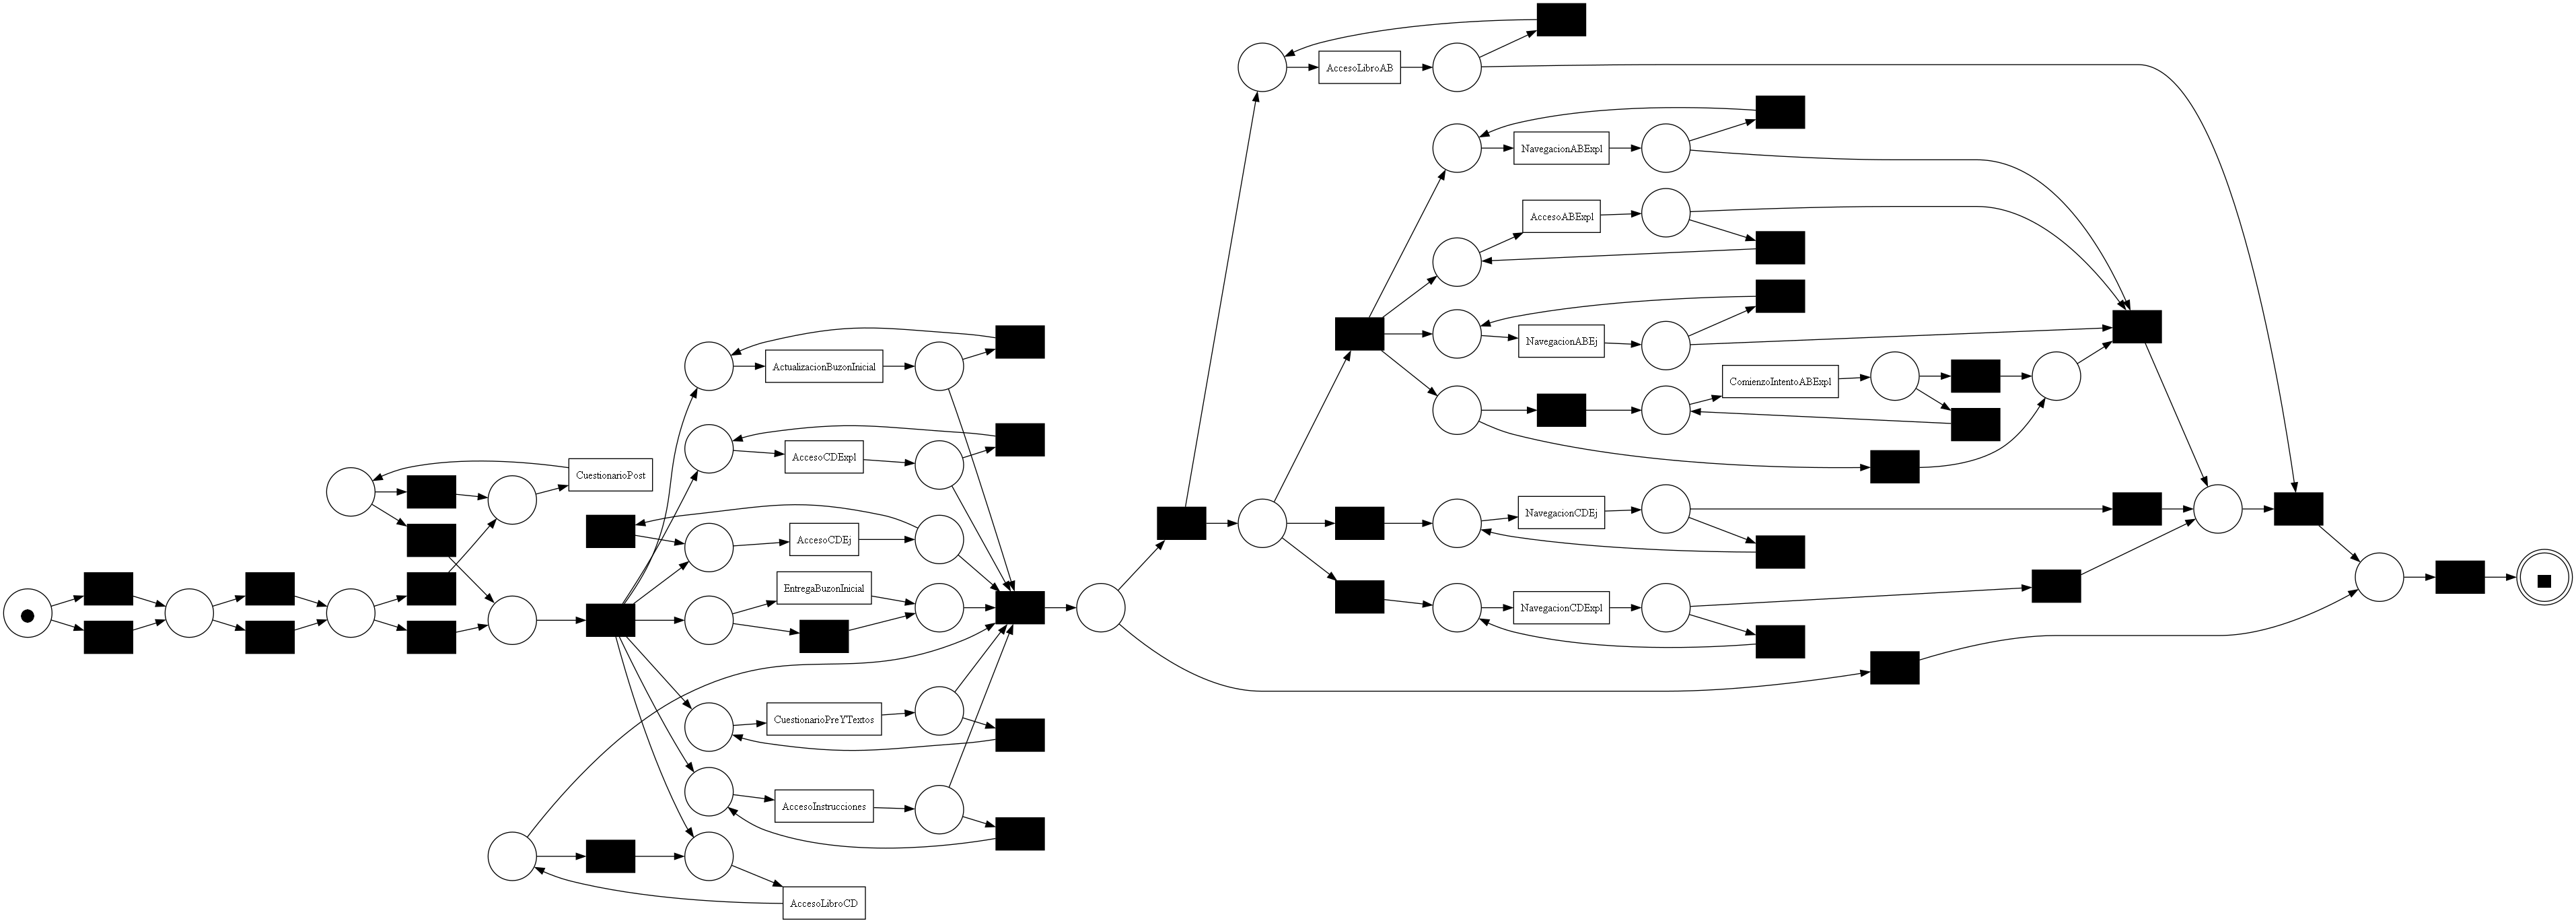

In [6]:
# Red Petri
net, im, fm = pm4py.discover_petri_net_inductive(event_log_filtered, noise_threshold=0.2)
pm4py.view_petri_net(net, im, fm)
pm4py.save_vis_petri_net(net, im, fm, 'Graphs/5-Modelo-17.png')

In [7]:
# Conformance checking
print(pm4py.fitness_token_based_replay(event_log_filtered, net, im, fm))
print(pm4py.precision_token_based_replay(event_log_filtered, net, im, fm))
print(generalization_evaluator.apply(event_log_filtered, net, im, fm))
print(simplicity_evaluator.apply(net))

replaying log with TBR, completed variants ::   0%|          | 0/187 [00:00<?, ?it/s]

{'perc_fit_traces': 0.5076142131979695, 'average_trace_fitness': 0.8316735419964232, 'log_fitness': 0.8827500623910776, 'percentage_of_fitting_traces': 0.5076142131979695}


replaying log with TBR, completed variants ::   0%|          | 0/5603 [00:00<?, ?it/s]

0.7004649254751811


replaying log with TBR, completed variants ::   0%|          | 0/187 [00:00<?, ?it/s]

0.7588530686970543
0.6000000000000001


In [8]:
# Analisis sobre los grupos que aparecen en los eventos AB, CD
event_log_AB = event_log_filtered.loc[(event_log_filtered['Grupo']=='A') | (event_log_filtered['Grupo']=='B')]
print(event_log_AB['Evento'].unique())

process_tree = pm4py.discover_process_tree_inductive(event_log_AB, noise_threshold=0.2)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
model_name = "Graphs/Grupos/Models/AB-Modelo_17.png"
pm4py.save_vis_bpmn(bpmn_model, model_name)

event_log_CD = event_log_filtered.loc[(event_log_filtered['Grupo']=='C') | (event_log_filtered['Grupo']=='D')]
print(event_log_CD['Evento'].unique())

process_tree = pm4py.discover_process_tree_inductive(event_log_CD, noise_threshold=0.2)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
model_name = "Graphs/Grupos/Models/CD-Modelo_17.png"
pm4py.save_vis_bpmn(bpmn_model, model_name)


['CuestionarioPreYTextos' 'EntregaBuzonInicial' 'AccesoLibroAB'
 'AccesoABExpl' 'NavegacionABExpl' 'ComienzoIntentoABExpl'
 'EntregaIntentoABExpl' 'AccesoInstrucciones' 'CuestionarioPost'
 'EntregaBuzonFinal' 'AccesoABEj' 'NavegacionABEj' 'ComienzoIntentoABEj'
 'EntregaIntentoABEj' 'AccesoLibroCD' 'AccesoCDEj' 'NavegacionCDEj'
 'ComienzoIntentoCDEj' 'ActualizacionBuzonFinal'
 'ActualizacionBuzonInicial' 'NavegacionCDExpl' 'ComienzoIntentoCDExpl'
 'AccesoCDExpl']
['CuestionarioPreYTextos' 'CuestionarioPost' 'AccesoLibroCD'
 'EntregaBuzonInicial' 'AccesoCDExpl' 'NavegacionCDExpl'
 'ComienzoIntentoCDExpl' 'EntregaIntentoCDExpl' 'NavegacionCDEj'
 'ComienzoIntentoCDEj' 'AccesoCDEj' 'AccesoLibroAB' 'EntregaIntentoCDEj'
 'EntregaBuzonFinal' 'AccesoInstrucciones' 'ActualizacionBuzonInicial'
 'NavegacionABExpl' 'ComienzoIntentoABExpl' 'AccesoABExpl'
 'ActualizacionBuzonFinal' 'AccesoABEj' 'NavegacionABEj'
 'ComienzoIntentoABEj']


In [9]:
# Unificacion de nombres de eventos
event_log_full['Evento2'] = event_log_full['Evento'].str.replace('AB', '')
event_log_full['Evento2'] = event_log_full['Evento2'].str.replace('CD', '')
print(event_log_full['Evento2'].unique())
event_log_reduced = pm4py.format_dataframe(event_log_full, case_id='Nombrecompletodelusuario', activity_key='Evento2', timestamp_key='Hora')

['AccesoInstrucciones' 'ActualizacionBuzonInicial' 'EntregaBuzonInicial'
 'ActualizacionBuzonFinal' 'EntregaBuzonFinal' 'CuestionarioPreYTextos'
 'CuestionarioPost' 'AccesoLibro' 'AccesoExpl' 'AccesoEj'
 'EntregaIntentoEj' 'NavegacionEj' 'NavegacionExpl' 'ComienzoIntentoExpl'
 'ComienzoIntentoEj' 'EntregaIntentoExpl']


['CuestionarioPreYTextos' 'EntregaBuzonInicial' 'AccesoLibroAB'
 'AccesoABExpl' 'NavegacionABExpl' 'ComienzoIntentoABExpl'
 'CuestionarioPost' 'AccesoLibroCD' 'AccesoCDExpl' 'NavegacionCDExpl'
 'ComienzoIntentoCDExpl' 'EntregaIntentoCDExpl' 'NavegacionCDEj'
 'ComienzoIntentoCDEj' 'AccesoCDEj' 'EntregaIntentoABExpl'
 'AccesoInstrucciones' 'EntregaIntentoCDEj' 'EntregaBuzonFinal'
 'AccesoABEj' 'NavegacionABEj' 'ComienzoIntentoABEj' 'EntregaIntentoABEj'
 'ActualizacionBuzonFinal' 'ActualizacionBuzonInicial']


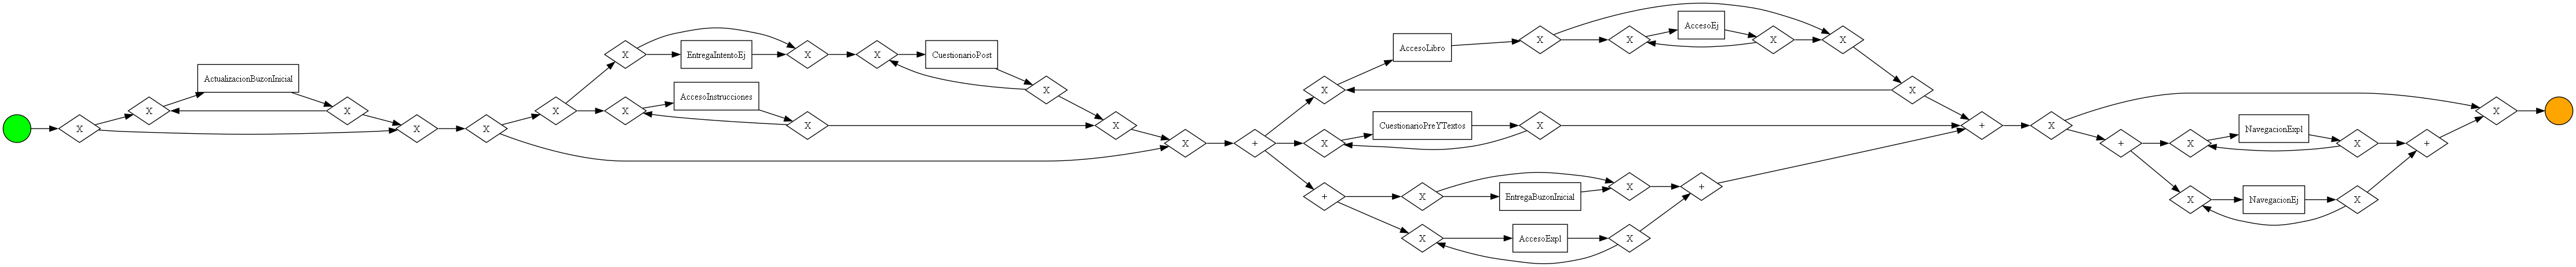

In [10]:
# Eventos unificados
print(event_log_reduced['Evento'].unique())
# Modelo BPMN
process_tree_r = pm4py.discover_process_tree_inductive(event_log_reduced, noise_threshold=0.2)
bpmn_model_r = pm4py.convert_to_bpmn(process_tree_r)
pm4py.view_bpmn(bpmn_model_r)
pm4py.save_vis_bpmn(bpmn_model_r, 'Graphs/1-Modelo-17-reduced.png')